In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd

In [16]:
host = 'localhost'
database = 'spatial'
user = 'postgres'
port = '5432'
password = os.getenv('SQL_PASSWORD')

In [17]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys']

In [18]:
citi_text = """ select * from ch11.cities
"""

cities = gpd.read_postgis(citi_text, con=engine)

In [45]:
cities_part = cities[cities["city"].isin(['BRISBANE', 'SAN FRANCISCO'])]
cities_part

,gid,city,area__,length__,geom
11,102,SAN FRANCISCO,4.921730e+04,2408.627699,"MULTIPOLYGON (((6016938.75 2107639.58, 6016955..."
12,103,SAN FRANCISCO,9.025257e+05,4667.016250,"MULTIPOLYGON (((6006359.581 2129526.79, 600672..."
16,14,BRISBANE,5.421647e+04,1694.986297,"MULTIPOLYGON (((6014266.9 2084758.77, 6013764...."
31,104,SAN FRANCISCO,2.463098e+07,33500.630079,"MULTIPOLYGON (((6022038.87 2130470.36, 6022352..."
78,75,SAN FRANCISCO,8.977878e+07,57489.942550,"MULTIPOLYGON (((6015965.54 2059363.85, 6014624..."
100,107,SAN FRANCISCO,1.287809e+09,288196.058977,"MULTIPOLYGON (((6001155.17 2122697.49, 6001205..."
101,108,SAN FRANCISCO,8.146695e+03,382.966986,"MULTIPOLYGON (((6001205.38 2122628.86, 6001155..."
107,101,SAN FRANCISCO,2.297130e+04,1091.049133,"MULTIPOLYGON (((6017336.79 2107205.46, 6017327..."
111,112,BRISBANE,1.323031e+08,67711.082027,"MULTIPOLYGON (((6013975.961 2085906.81, 601376..."


In [51]:
len(cities["city"].unique())

98

C:\Users\yyang\AppData\Local\Temp\ipykernel_52060\264490837.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title="City", loc="upper left", fontsize=8, frameon=True)
C:\Users\yyang\AppData\Local\Temp\ipykernel_52060\264490837.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="City", loc="upper left", fontsize=8, frameon=True)


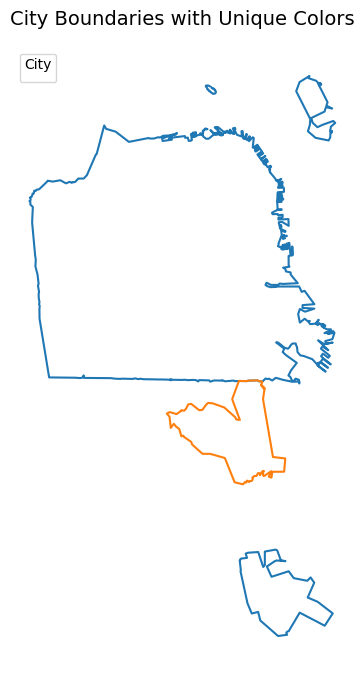

In [47]:
# 🔹 Ensure the geometry column is correctly set
gdf = cities_part.set_geometry("geom")

# 🔹 Generate a unique color for each city
unique_cities = gdf["city"].unique()
color_map = {city: color for city, color in zip(unique_cities, mcolors.TABLEAU_COLORS)}

# 🔹 Plot the GeoDataFrame with city-based boundary colors
fig, ax = plt.subplots(figsize=(12, 8))

for city, color in color_map.items():
    cities_part[cities_part["city"] == city].plot(ax=ax, edgecolor=color, facecolor="none", linewidth=1.5, label=city)

# 🔹 Customize plot appearance
ax.set_title("City Boundaries with Unique Colors", fontsize=14)
ax.axis("off")  # Hide axis
plt.legend(title="City", loc="upper left", fontsize=8, frameon=True)

# 🔹 Show the plot
plt.show()



In [48]:
color_map

{'SAN FRANCISCO': 'tab:blue', 'BRISBANE': 'tab:orange'}